# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [140]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1889/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

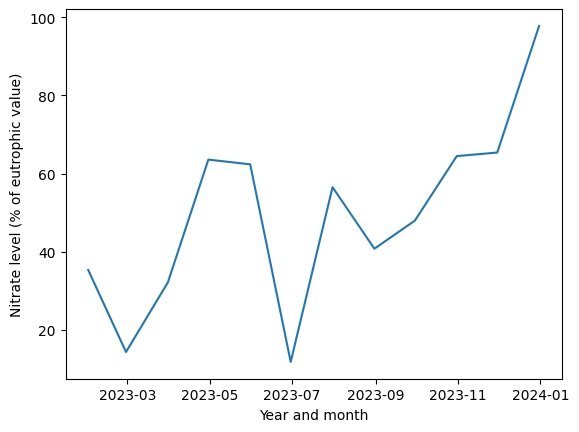

In [141]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_1889/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

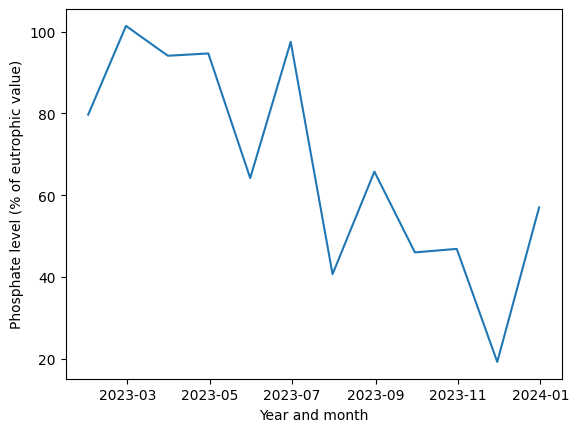

In [142]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

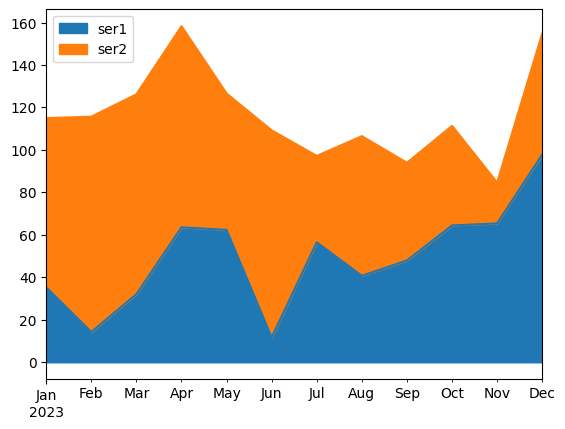

In [143]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

Pro:
It can shows overall trends and volume more clearly.
Highlights differences between two datasets.

Con:
One area might cover the other, hiding details.
Harder to see exact data points.

It should add title and add grid.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [144]:
df_1 = pd.read_csv("dataset_1.csv")
df_2 = pd.read_csv("dataset_2.csv")
df_3 = pd.read_csv("dataset_3.csv")

In [145]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [146]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [147]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [148]:
df_1.isnull().sum()


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [149]:
df_2.isnull().sum()


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [150]:
df_3.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [151]:
df_1 = df_1.drop(columns=["PolicyNumber","RepNumber"])

In [152]:
df_2 = df_2.drop(columns=["PolicyNumber"])

In [153]:
df_3 = df_3.drop(columns=["_c39","policy_number"])

In [154]:
df_1.dropna()
df_2.dropna()
df_3.dropna()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       2014-10-17           OH    250/500   
1                   228   42       2006-06-27           IN    250/500   
2                   134   29       2000-09-06           OH    100/300   
3                   256   41       1990-05-25           IL    250/500   
5                   256   39       2006-10-12           OH    250/500   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-01-05           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
5                 1000                1351.10               0       478456   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... witnesses police_report_available total_claim_amount  \
0          MALE  ...         2                     YES              71610   
1          MALE  ...         0                       ?               5070   
2        FEMALE  ...         3                      NO              34650   
3        FEMALE  ...         2                      NO              63400   
5        FEMALE  ...         2                      NO              64100   
..          ...  ...       ...                     ...                ...   
995      FEMALE  ...         1                       ?              87200   
996      FEMALE  ...         3                       ?             108480   
997      FEMALE  ...         3                     YES              67500   
998        MALE  ...         1                     YES              46980   
999      FEMALE  ...         3                       ?               5060   

    injury_claim  property_claim  vehicle_claim   auto_make auto_model  \
0           6510           13020          52080        Saab        92x   
1            780             780           3510    Mercedes       E400   
2           7700            3850          23100       Dodge        RAM   
3           6340            6340          50720   Chevrolet      Tahoe   
5           6410            6410          51280        Saab         95   
..           ...             ...            ...         ...        ...   
995        17440            8720          61040       Honda     Accord   
996        18080           18080          72320  Volkswagen     Passat   
997         7500            7500          52500      Suburu    Impreza   
998         5220            5220          36540        Audi         A5   
999          460             920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
5        2003              Y  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[909

In [155]:
df_1.drop_duplicates(inplace=True)
df_2.drop_duplicates(inplace=True)
df_3.drop_duplicates(inplace=True)

In [156]:
df_1 = df_1.drop(df_1[df_1["Age"]== 0].index)
df_1["FraudFound"] = df_1["FraudFound"].map({"Yes": 1, "No": 0})
df_1["MaritalStatus"] = df_1["MaritalStatus"].map({"Married":1, "Single":0, "Divorced": 2})
df_1["AccidentArea"] = df_1["AccidentArea"].map({"Urban":1, "Rural":0})
df_1["Gender"] = df_1["Sex"].map({"Female":1, "Male":0})
df_3["FraudReport"] = df_3["fraud_reported"].map({"Y":1, "N":0})


In [157]:
numeric_df_1 = df_1.select_dtypes(include=["number"])
numeric_df_2 = df_2.select_dtypes(include=["number"])
numeric_df_3 = df_3.select_dtypes(include=["number"])

Find correlations between pairs of variables.


In [158]:
corr_1 = numeric_df_1.corr()
corr_2 = numeric_df_2.corr()
corr_3 = numeric_df_3.corr()

In [159]:
corr_1

WeekOfMonth  AccidentArea  WeekOfMonthClaimed  \
WeekOfMonth            1.000000      0.006800            0.277037   
AccidentArea           0.006800      1.000000            0.005635   
WeekOfMonthClaimed     0.277037      0.005635            1.000000   
MaritalStatus         -0.022464     -0.009903            0.001301   
Age                   -0.011905     -0.004353            0.001025   
Deductible            -0.004131      0.004791            0.005257   
DriverRating          -0.016168     -0.001799            0.002022   
Year                  -0.005271      0.005683            0.012217   
FraudFound            -0.011276     -0.036761           -0.005881   
Gender                -0.006243      0.032614           -0.003923   

                    MaritalStatus       Age  Deductible  DriverRating  \
WeekOfMonth             -0.022464 -0.011905   -0.004131     -0.016168   
AccidentArea            -0.009903 -0.004353    0.004791     -0.001799   
WeekOfMonthClaimed       0.001301  0.001025    0.005257      0.002022   
MaritalStatus            1.000000  0.399368    0.032220      0.012678   
Age                      0.399368  1.000000    0.064278      0.000673   
Deductible               0.032220  0.064278    1.000000      0.003664   
DriverRating             0.012678  0.000673    0.003664      1.000000   
Year                     0.010751  0.016682   -0.001962     -0.013266   
FraudFound               0.005508 -0.022494    0.018201      0.006397   
Gender                  -0.121328 -0.111120   -0.016493      0.002663   

                        Year  FraudFound    Gender  
WeekOfMonth        -0.005271   -0.011276 -0.006243  
AccidentArea        0.005683   -0.036761  0.032614  
WeekOfMonthClaimed  0.012217   -0.005881 -0.003923  
MaritalStatus       0.010751    0.005508 -0.121328  
Age                 0.016682   -0.022494 -0.111120  
Deductible         -0.001962    0.018201 -0.016493  
DriverRating       -0.013266    0.006397  0.002663  
Year                1.000000   -0.017972 -0.001941  
FraudFound         -0.017972    1.000000 -0.029063  
Gender             -0.001941   -0.029063  1.000000

In [160]:
corr_2

WeekOfMonth  WeekOfMonthClaimed       Age  FraudFound_P  \
WeekOfMonth            1.000000            0.276591  0.000329     -0.007425   
WeekOfMonthClaimed     0.276591            1.000000  0.005809     -0.006493   
Age                    0.000329            0.005809  1.000000     -0.032196   
FraudFound_P          -0.007425           -0.006493 -0.032196      1.000000   
RepNumber              0.002149            0.013088 -0.005568     -0.004267   
Deductible            -0.007399            0.004319  0.064373      0.031922   
DriverRating          -0.012454            0.001072  0.000352      0.008840   
Year                   0.005306            0.018671  0.020312     -0.029328   
ClaimSize              0.003870            0.000923 -0.066310      0.020602   

                    RepNumber  Deductible  DriverRating      Year  ClaimSize  
WeekOfMonth          0.002149   -0.007399     -0.012454  0.005306   0.003870  
WeekOfMonthClaimed   0.013088    0.004319      0.001072  0.018671   0.000923  
Age                 -0.005568    0.064373      0.000352  0.020312  -0.066310  
FraudFound_P        -0.004267    0.031922      0.008840 -0.029328   0.020602  
RepNumber            1.000000    0.002378      0.010394  0.010441   0.016702  
Deductible           0.002378    1.000000      0.015733  0.000267  -0.008204  
DriverRating         0.010394    0.015733      1.000000 -0.010435  -0.144898  
Year                 0.010441    0.000267     -0.010435  1.000000  -0.021359  
ClaimSize            0.016702   -0.008204     -0.144898 -0.021359   1.000000

In [161]:
corr_3

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
insured_zip                            0.017895  0.025604           0.004545   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
FraudReport                            0.020544  0.012143           0.014817   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
insured_zip                               0.032354        0.019671   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
incident_hour_of_the_day                 -0.001578       -0.023257   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   
FraudReport                              -0.014480        0.058622   

                             insured_zip  capital-gains  capital-loss  \
months_as_customer              0.017895       0.006399      0.020209   
age                             0.025604      -0.007075      0.007368   
policy_deductable               0.004545       0.035212     -0.023544   
policy_annual_premium           0.032354      -0.013738      0.023547   
umbrella_limit                  0.019671      -0.047268     -0.024056   
insured_zip                     1.000000       0.006303      0.049372   
capital-gains                   0.006303       1.000000     -0.046904   
capital-loss                    0.049372      -0.046904      1.000000   
incident_hour_of_the_day        0.008274      -0.016406     -0.025054   
number_of_vehicles_involved     0.027448       0.061643     -0.014895   
bodily_injuries                 0.028695       0.055829     -0.024418   
witnesses                       0.019805      -0.017651     -0.041330   
total_claim_amount             -0.033873       0.015980     -0.036060   
injury_claim                   -0.017495       0.025934     -0.046060   
property_claim                 -0.006841      -0.000779     -0.022863   
vehicle_c


- Draw scatterplots, especially when the correlation is large.


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_high_corr_scatter(df, threshold=0.2):
    numeric_df = df.select_dtypes(include=["number"])
    numeric_cols = numeric_df.columns
    corr_matrix = numeric_df.corr()
    num_cols_len = len(numeric_cols)
    for i in range(num_cols_len):
        for j in range(i + 1, num_cols_len): 
            col1, col2 = numeric_cols[i], numeric_cols[j]
            correlation = corr_matrix.loc[col1, col2]
            
            if abs(correlation) > threshold: 
                plt.figure(figsize=(6, 4))
                sns.scatterplot(x=df[col1], y=df[col2])
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.title(f"Scatterplot of {col1} vs {col2} (Corr: {correlation:.2f})")
                plt.show()


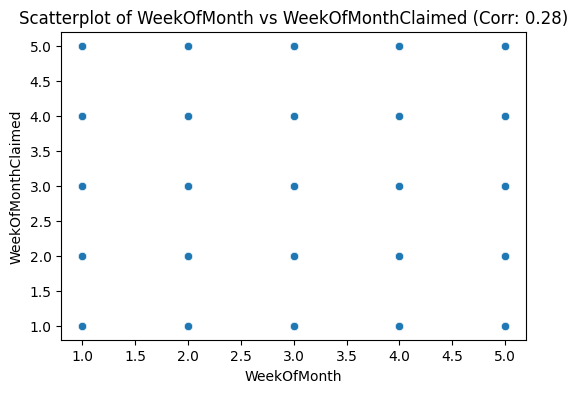

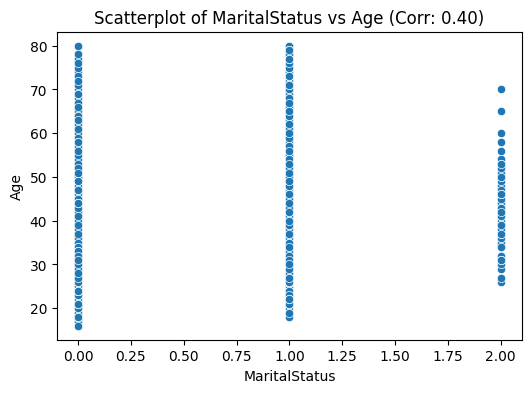

In [164]:
plot_high_corr_scatter(df_1)

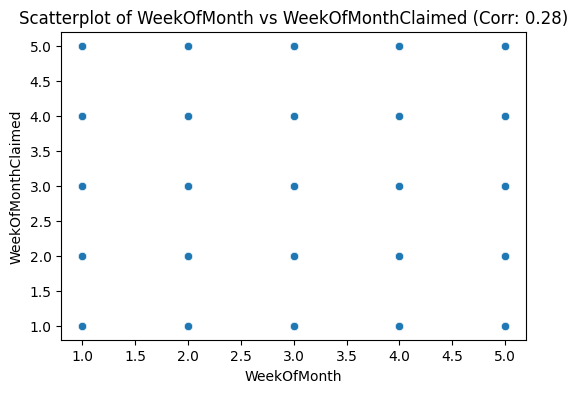

In [165]:
plot_high_corr_scatter(df_2)

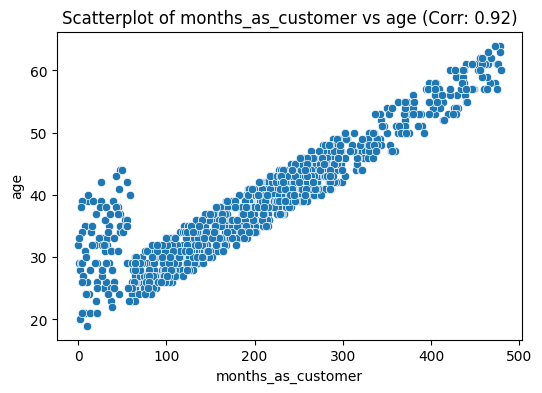

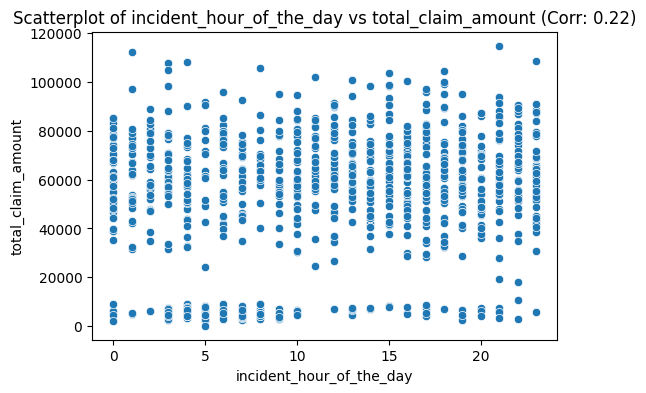

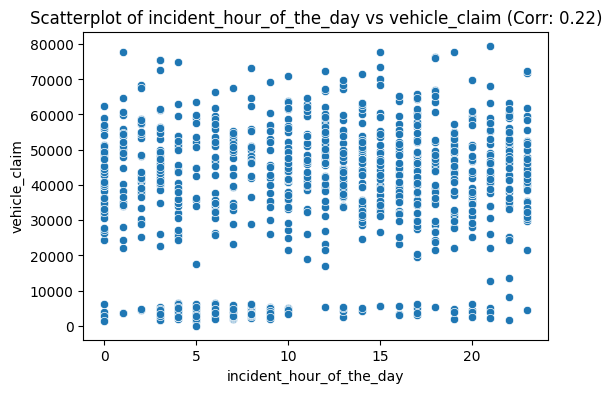

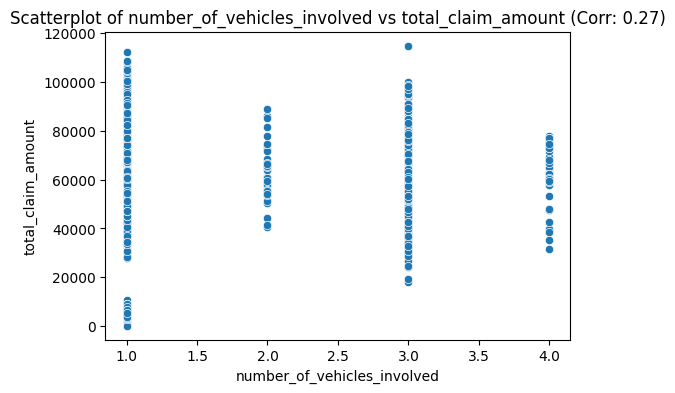

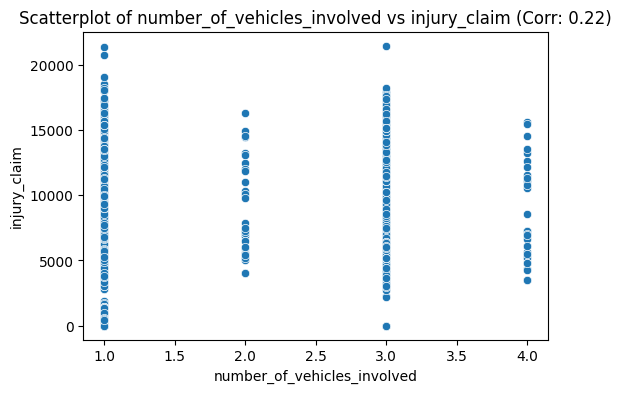

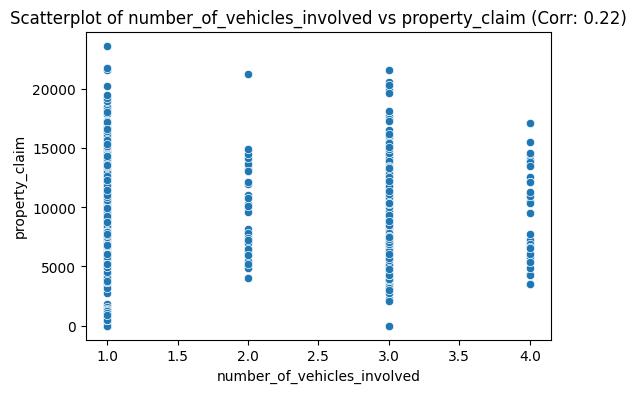

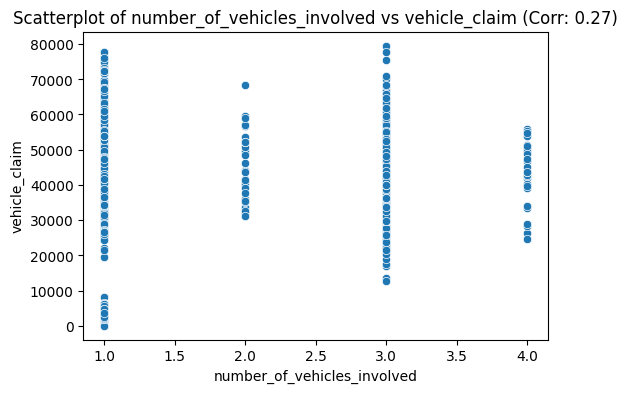

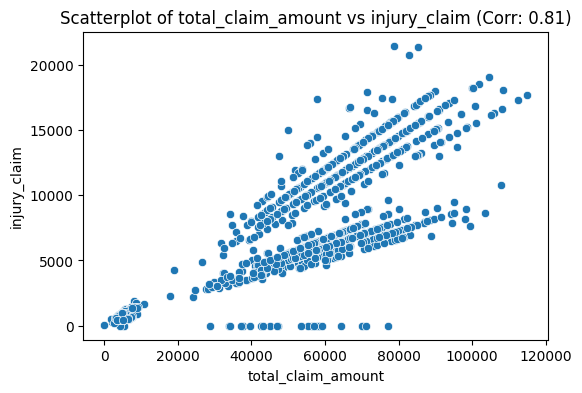

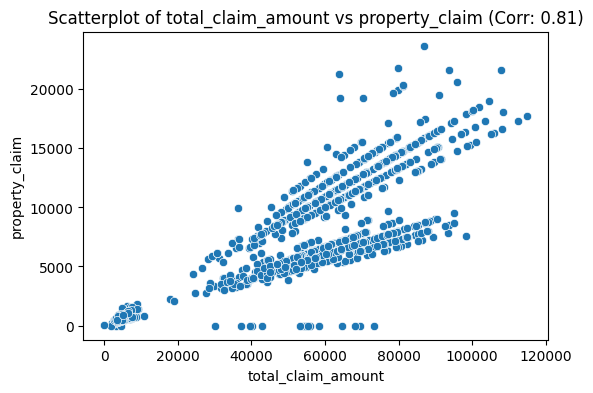

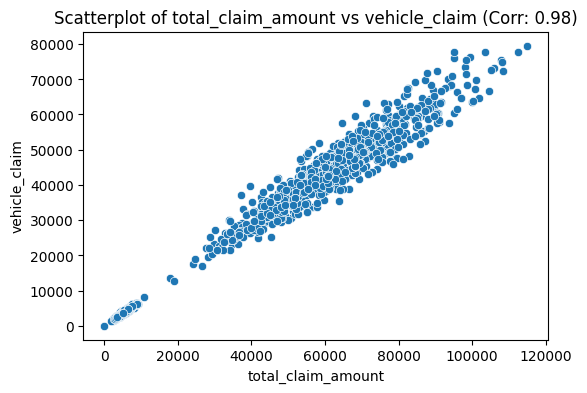

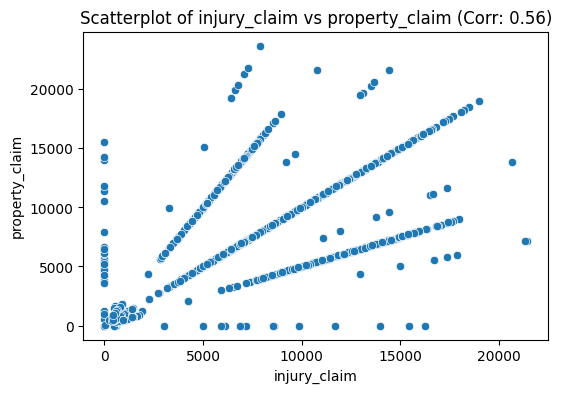

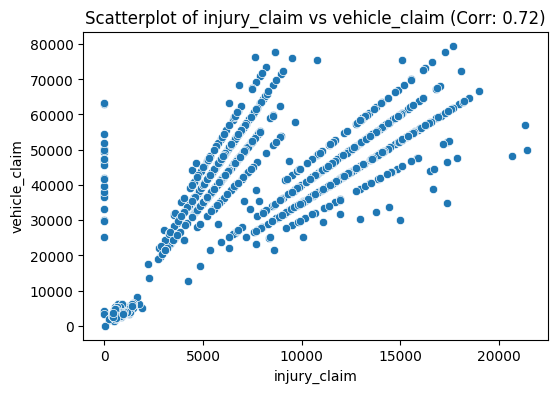

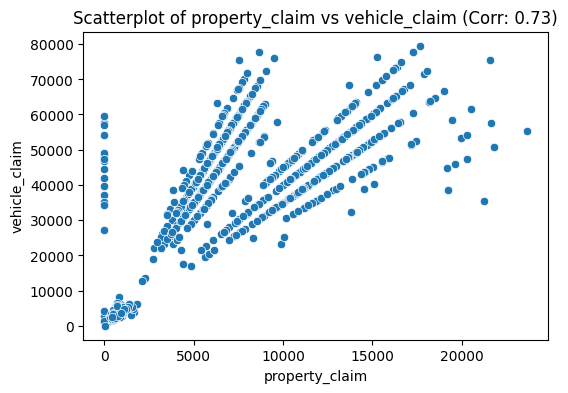

In [166]:
plot_high_corr_scatter(df_3)



- Draw pairplots.


In [167]:
def plot_high_corr_pairplot(df, threshold=0.05):
    numeric_df = df.select_dtypes(include=["number"])
    corr_matrix = numeric_df.corr()

    high_corr_cols = set()
    for col in corr_matrix.columns:
        if any(abs(corr_matrix[col]) > threshold) and col not in high_corr_cols:
            high_corr_cols.add(col)

    high_corr_cols = list(high_corr_cols)

    if len(high_corr_cols) < 2:
        print("No sufficient highly correlated variables found to plot.")
        return
    sns.pairplot(df[high_corr_cols])
    plt.show()


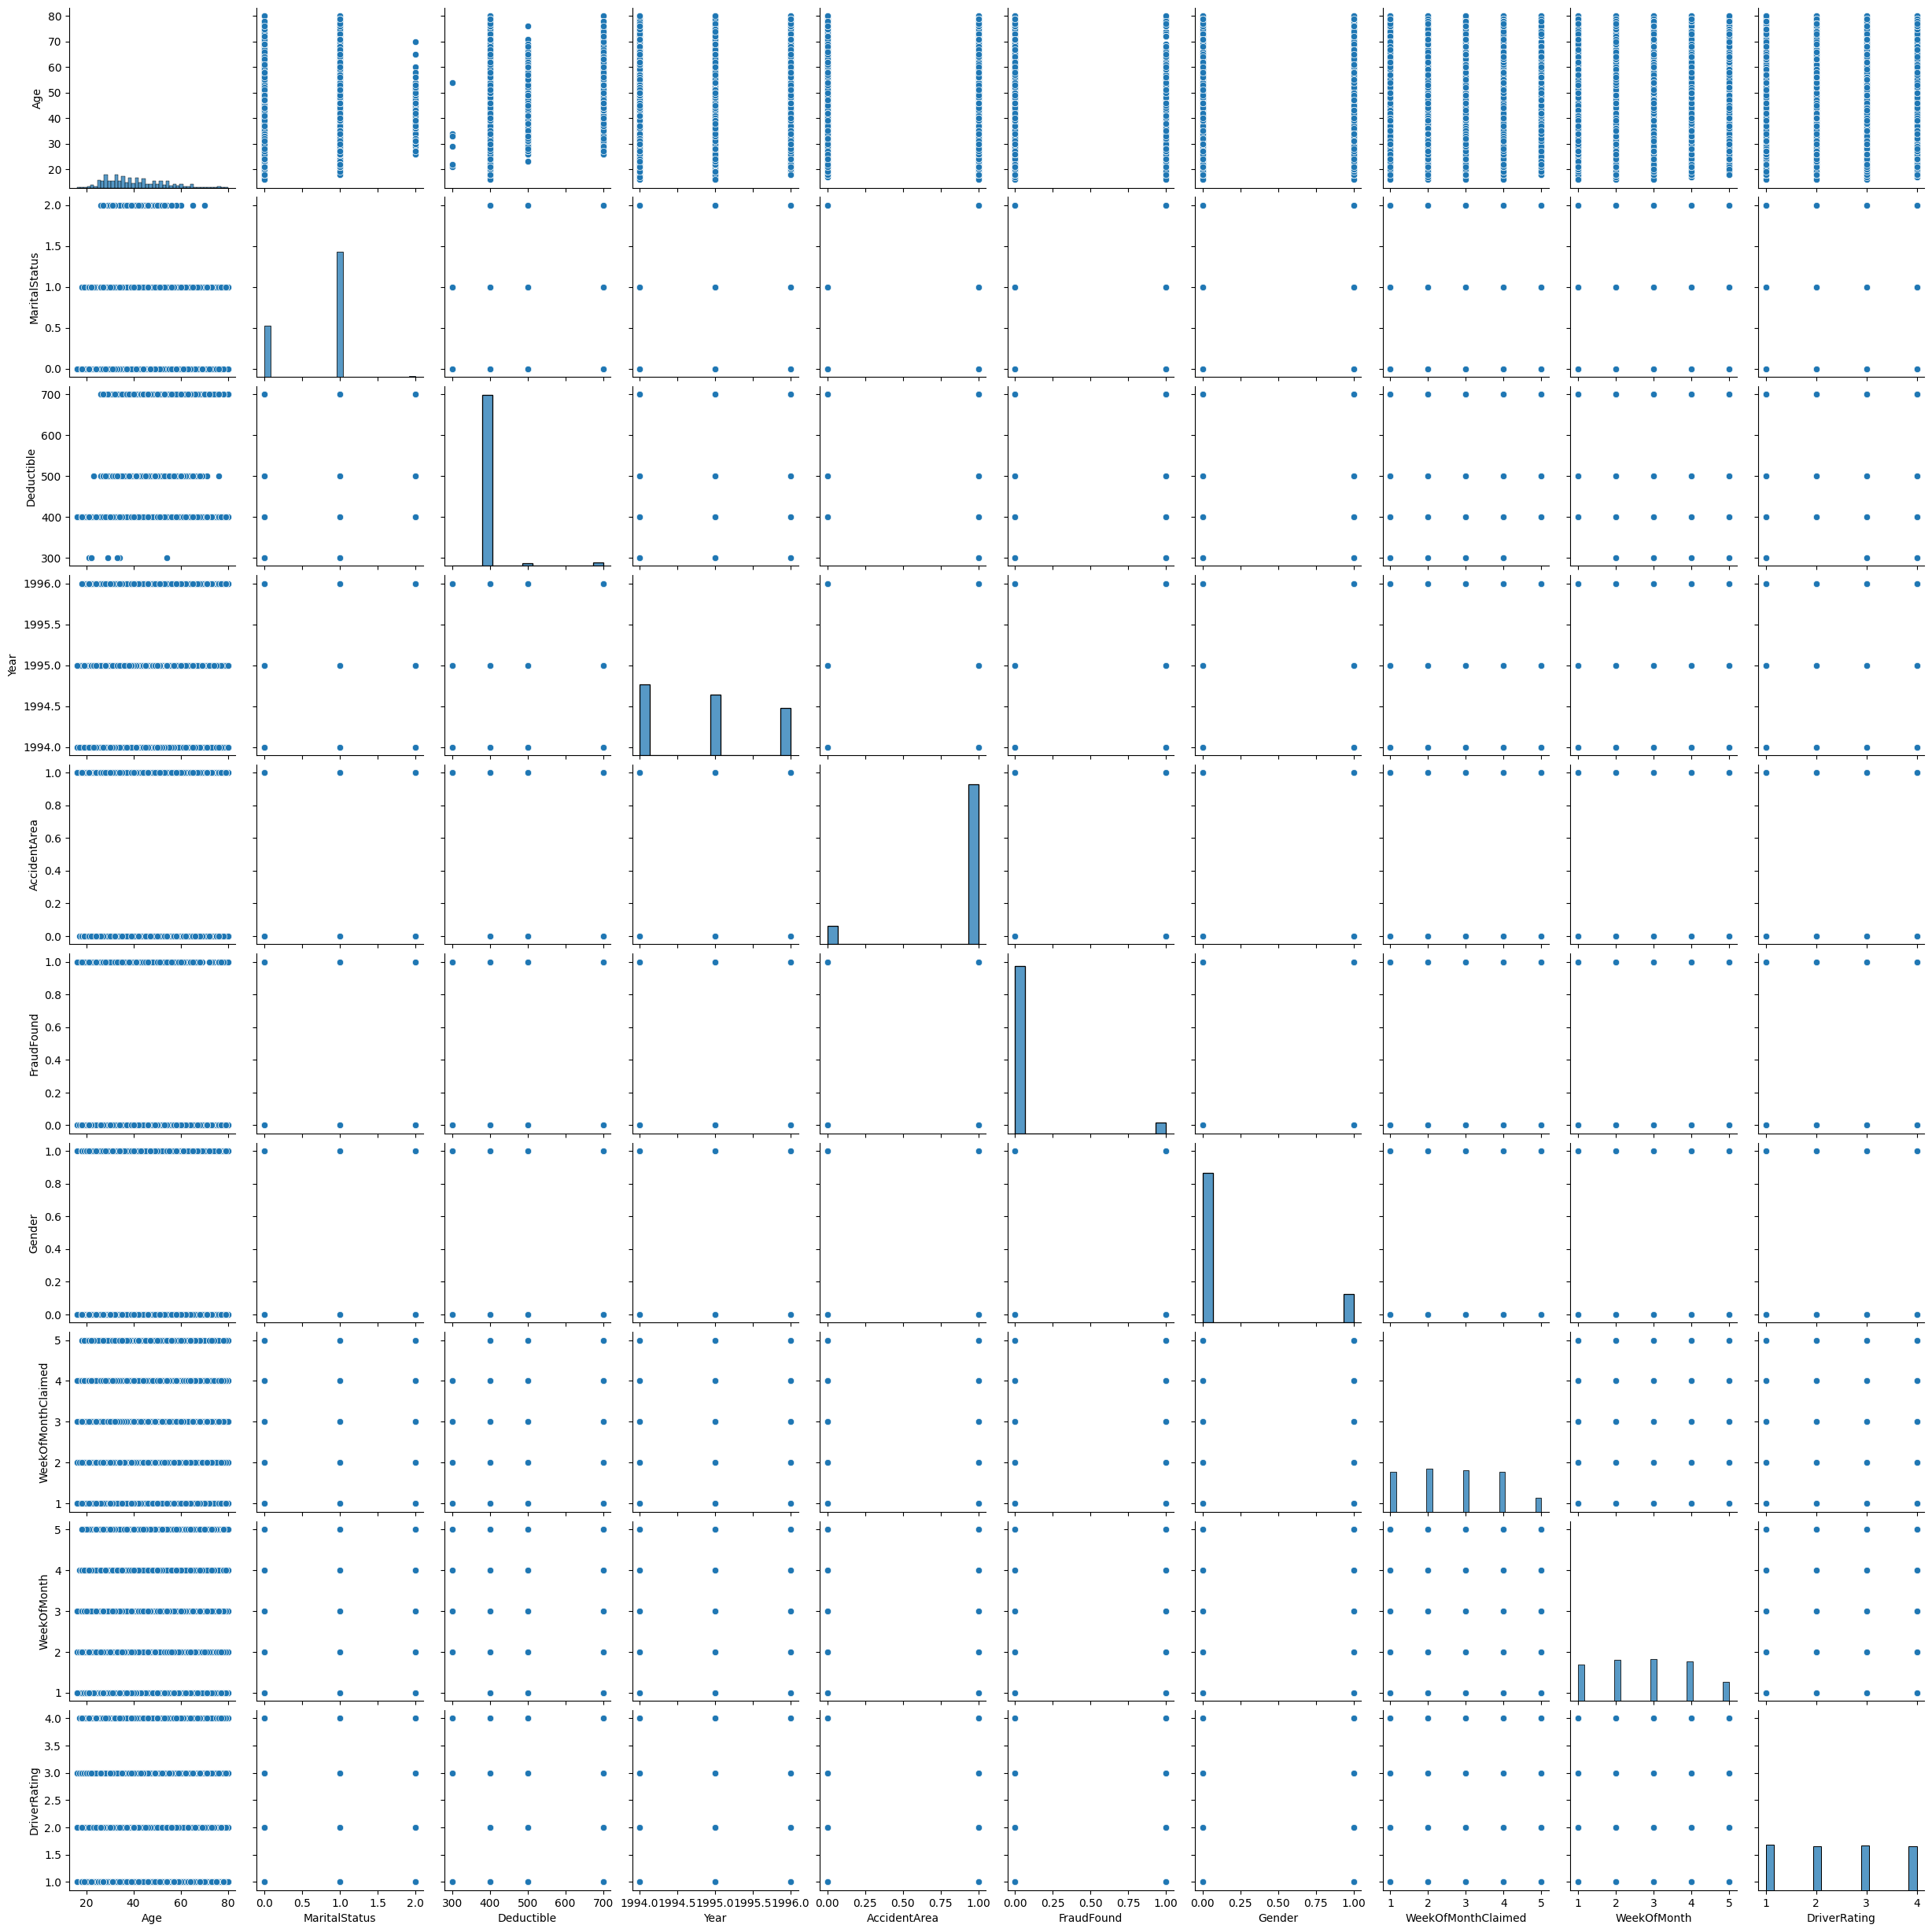

In [168]:
plot_high_corr_pairplot(df_1)

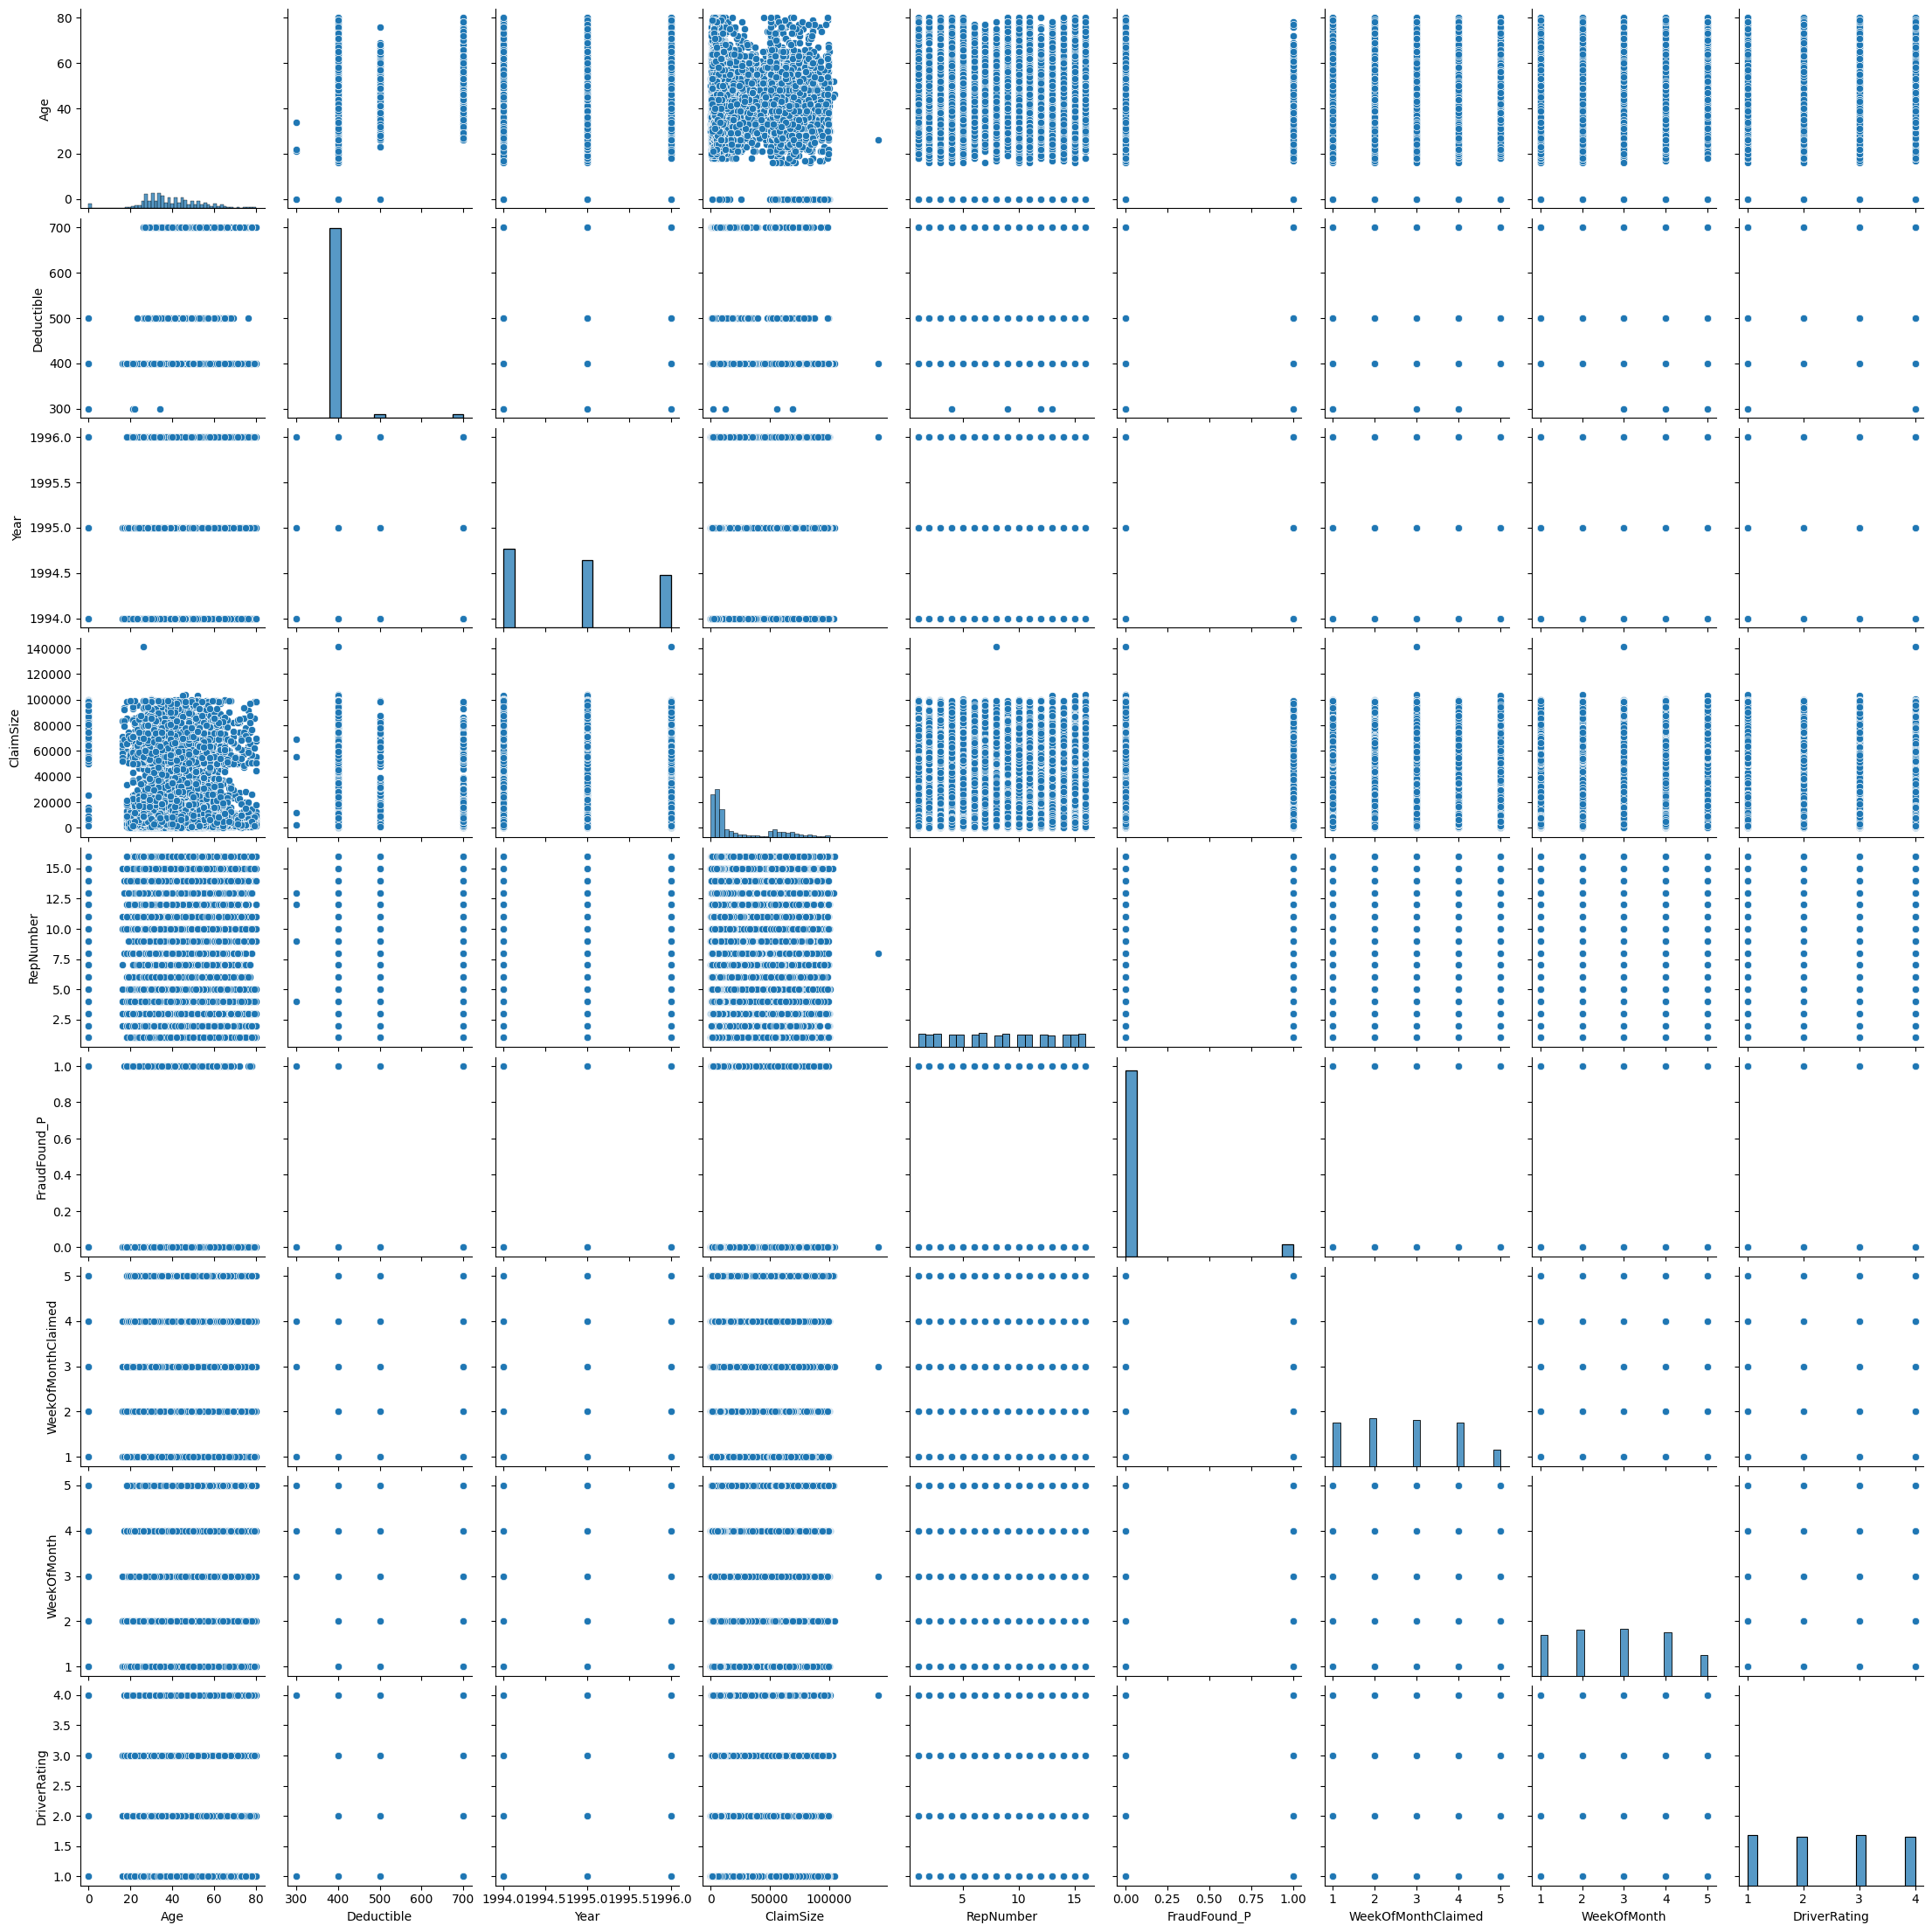

In [169]:
plot_high_corr_pairplot(df_2)

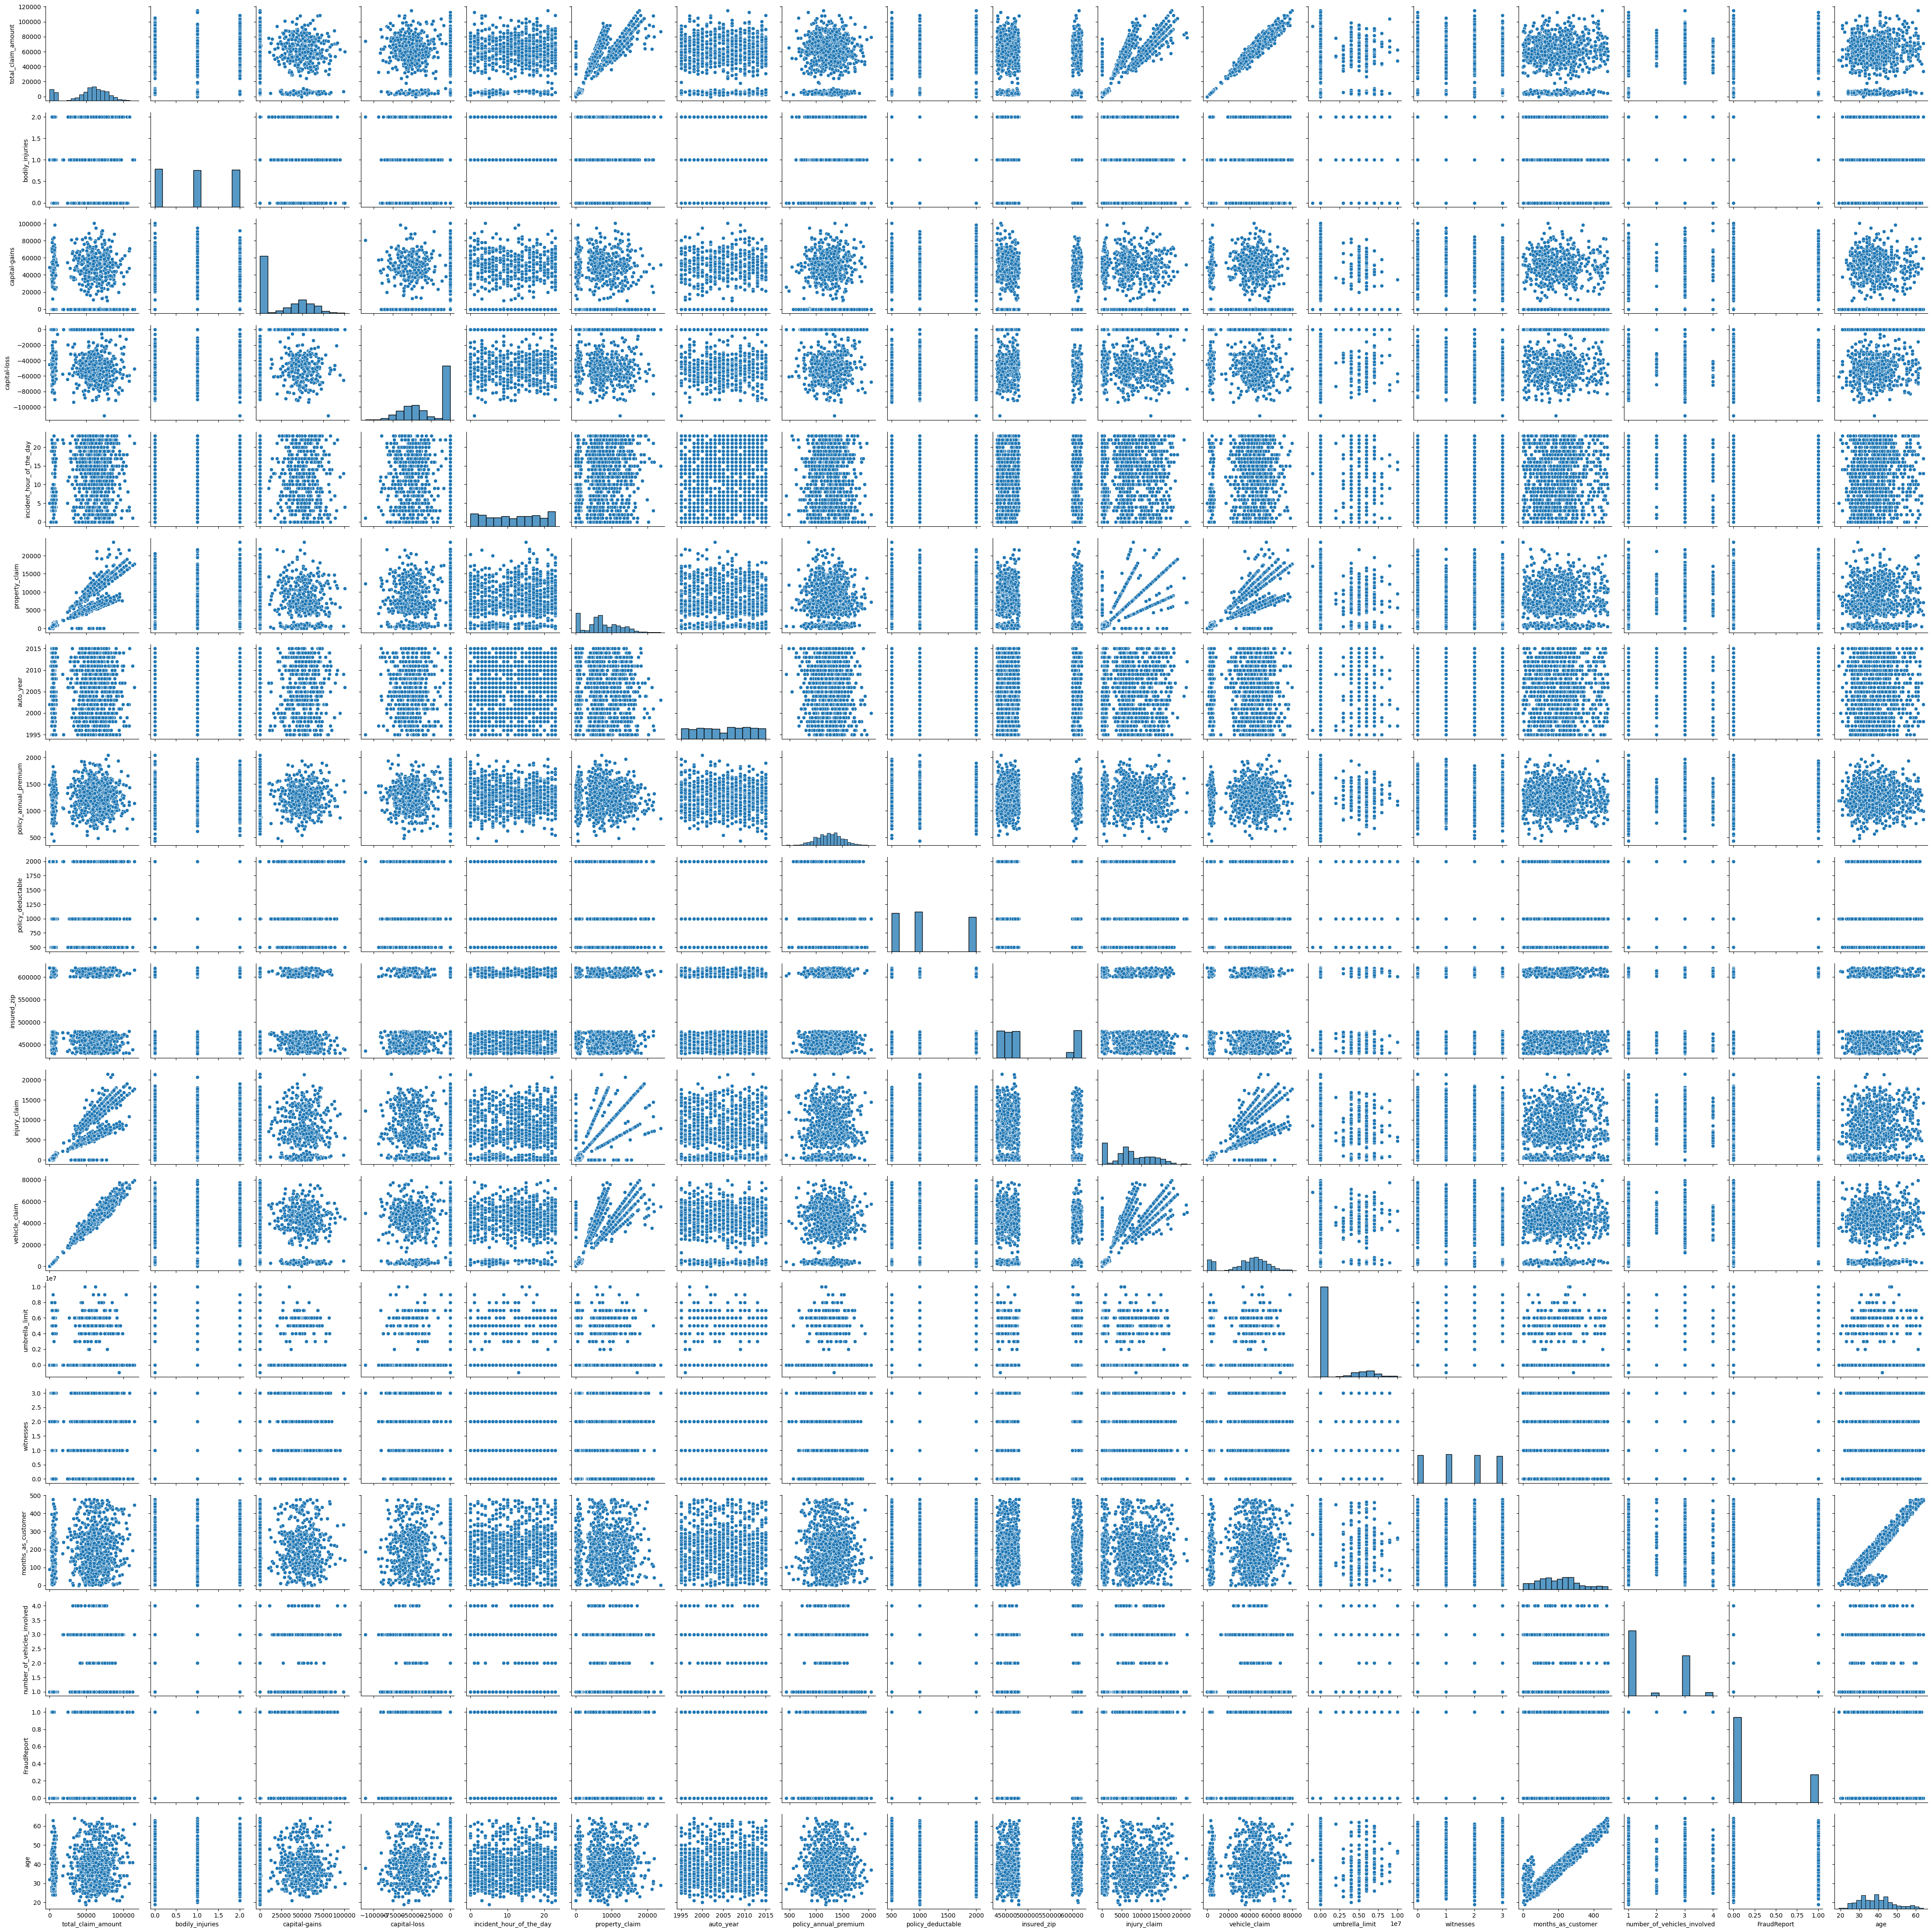

In [170]:
plot_high_corr_pairplot(df_3)


- Draw line graphs and/or area graphs when there is date or time data together with numerical data.


/tmp/ipykernel_1889/2109711102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FraudFound'] = df['FraudFound'].replace({'Yes': 1, 'No': 0}).astype(int)


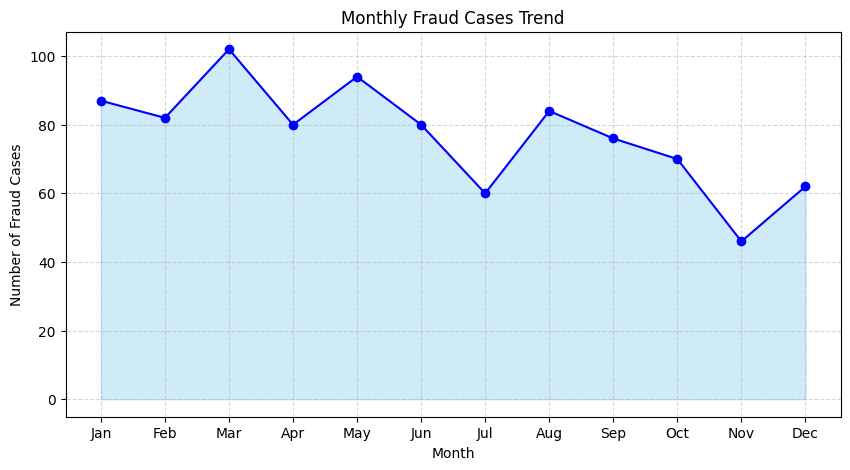

In [171]:
df = pd.read_csv("dataset_1.csv")
df['FraudFound'] = df['FraudFound'].replace({'Yes': 1, 'No': 0}).astype(int)
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


fraud_by_month = df.groupby('Month')['FraudFound'].sum().reindex(months_order, fill_value=0)


plt.figure(figsize=(10, 5))
plt.fill_between(fraud_by_month.index, fraud_by_month.values, color="skyblue", alpha=0.4)
plt.plot(fraud_by_month.index, fraud_by_month.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Month")
plt.ylabel("Number of Fraud Cases")
plt.title("Monthly Fraud Cases Trend")
plt.grid(True, linestyle="--", alpha=0.5)



### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!


Some of data are not my expect because it does not show the obivously correlation. Some data are useable. The data in the dataset 3 has strong correlation I will choose to focus on those data.


- Do you see any outliers?  (Data points that are far from the rest of the data).


Yes, such as claim size or deduction has outlier in the dataset 1.


- Are any data items highly correlated with each other, suggesting that they are redundant?


Yes,  PolicyNumber and Year have a strong positive because policy number is decided by the year. So I drop the policy number column.


- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?


I think I find some trend in the area graph, the fraud's case decreased over the time in one year.


- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

To check if AccidentArea is associated with FraudFound, we can analyze the fraud rate in each accident area and see if there is a notable difference.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

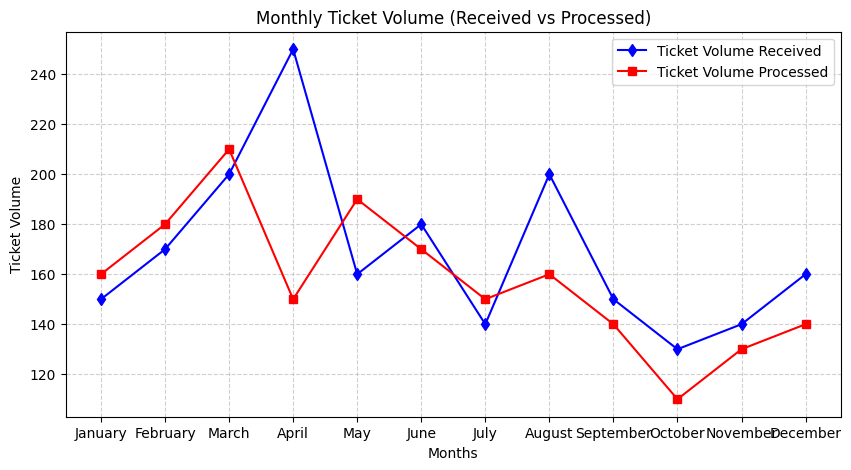

In [172]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
ticket_received = [150, 170, 200, 250, 160, 180, 140, 200, 150, 130, 140, 160]
ticket_processed = [160, 180, 210, 150, 190, 170, 150, 160, 140, 110, 130, 140]

plt.figure(figsize=(10, 5))
plt.plot(months, ticket_received, marker="d", linestyle="-", color="blue", label="Ticket Volume Received")
plt.plot(months, ticket_processed, marker="s", linestyle="-", color="red", label="Ticket Volume Processed")
plt.xlabel("Months")
plt.ylabel("Ticket Volume")
plt.title("Monthly Ticket Volume (Received vs Processed)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

